In [32]:
import os
import sys

dirname = '../../data/Mitochondria'
filename_tmhmm = os.path.join(dirname, 'UP000005640_9606.tmhmm.gz')

f_tmhmm = open(filename_tmhmm,'r')
if filename_tmhmm.endswith('.gz'):
    import gzip
    f_tmhmm = gzip.open(filename_tmhmm, 'rt')

tmhmm_list = dict()
for line in f_tmhmm:
    tokens = line.strip().split()
    
    if tokens[0].startswith('#'):
        if tokens[2].startswith('Length:'):
            seq_id = tokens[1]
            seq_len = int(tokens[3])
            tmhmm_list[seq_id] = {'len': seq_len, 'TMhelix': [], 'inside':[], 'outside':[]}
        continue
    else:
        seq_id = tokens[0]
        tmp_type = tokens[2]
        tmp_pos = (int(tokens[3]), int(tokens[4]))
        tmhmm_list[seq_id][tmp_type].append( tmp_pos )
f_tmhmm.close()

count_total = len(tmhmm_list)
count_MultiTM = 0
count_SingleTM = 0

tm_len_dist = []
tm_pos_dist = []
tm_flank_dist = []

for tmp_id in tmhmm_list.keys():
    if len(tmhmm_list[tmp_id]['TMhelix']) == 1:
        count_SingleTM += 1
        tmp_tm_start = tmhmm_list[tmp_id]['TMhelix'][0][1]
        tmp_tm_end = tmhmm_list[tmp_id]['TMhelix'][0][0]
        tmp_tm_len = tmp_tm_end - tmp_tm_start + 1
        tmp_tm_pos = tmp_tm_start + 0.5 * tmp_tm_len
        tmp_tm_flank = min( tmp_tm_start, tmhmm_list[tmp_id]['len'] - tmp_tm_end)
        tm_len_dist.append(tmp_tm_len)
        tm_flank_dist.append( tmp_tm_flank )
        tm_pos_dist.append(tmp_tm_pos*100.0/tmhmm_list[tmp_id]['len'])
    elif len(tmhmm_list[tmp_id]['TMhelix']) > 1:
        count_MultiTM += 1

import numpy as np

print(count_total, count_SingleTM, count_MultiTM)
print(np.mean(tm_len_dist) )

21009 2392 2971
-20.4218227425


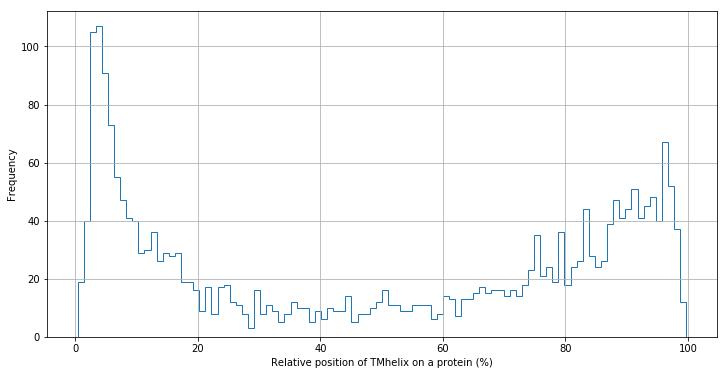

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,1,1)
ax1.hist(tm_pos_dist, bins=100, histtype='step')

ax1.set_xlabel("Relative position of TMhelix on a protein (%)")
ax1.set_ylabel("Frequency")
ax1.grid()
plt.show()

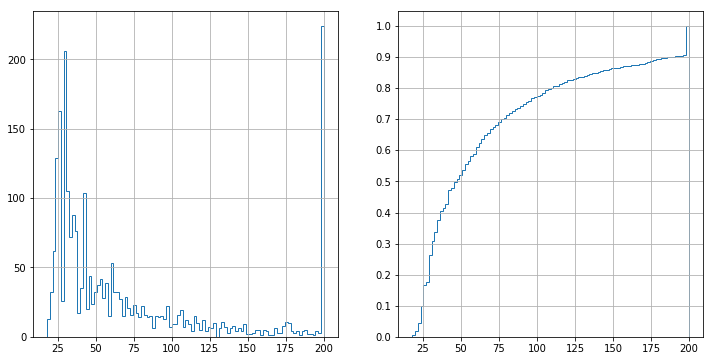

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax1.hist( [min(x, 200) for x in tm_flank_dist], bins=100, histtype='step', cumulative=False, normed=0 )
ax1.grid()

ax2 = fig.add_subplot(1,2,2)
ax2.hist( [min(x, 200) for x in tm_flank_dist], bins=100, histtype='step', cumulative=True, normed=1 )
ax2.grid()
ax2.set_yticks([x*0.1 for x in range(0,11)])

plt.show()